<a href="https://colab.research.google.com/github/suvam23/np03cs4a240165_5CS037_Worksheet1/blob/main/Suvam_Pant_Worksheet10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
df = pd.read_csv("/content/drive/MyDrive/AI/IMDB Dataset.csv")
length = len(df['review'])
print("Dataset info:")
print(f"Shape: {df.shape}")
print(f"\nColumn names: {df.columns.tolist()}")
print(f"\nFirst review example:\n{df['review'].iloc[0][:500]}...")
print(f"\nSentiment: {df['sentiment'].iloc[0]}")
print(f"\nSentiment distribution:")
print(df['sentiment'].value_counts())

Dataset info:
Shape: (50000, 2)

Column names: ['review', 'sentiment']

First review example:
One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ...

Sentiment: positive

Sentiment distribution:
sentiment
positive    25000
negative    25000
Name: count, dtype: int64


Part 1:

Load the dataset and preprocess the reviews.

a. Convert all text to lowercase.

b. Remove non-alphabetic characters (punctuation).

c. Tokenize the reviews and remove common stopwords.

d. Apply stemming to reduce words to their root form.

Split the dataset into training and testing sets (80% training, 20% testing).

Use a Naive Bayes classifier to classify the reviews into positive and negative categories.

a. Implement a Bag-of-Words model using CountVectorizer.

b. Train the Naive Bayes classifier using the training set.

In [2]:
# all reviews to lowercase
df['review'] = df['review'].str.lower()
print("After converting to lowercase:")
print(df['review'].iloc[0][:500])

After converting to lowercase:
one of the other reviewers has mentioned that after watching just 1 oz episode you'll be hooked. they are right, as this is exactly what happened with me.<br /><br />the first thing that struck me about oz was its brutality and unflinching scenes of violence, which set in right from the word go. trust me, this is not a show for the faint hearted or timid. this show pulls no punches with regards to drugs, sex or violence. its is hardcore, in the classic use of the word.<br /><br />it is called oz


In [3]:
import re

# Remove non-alphabetic characters and extra whitespace
df['review_clean'] = df['review'].apply(lambda x: re.sub(r'[^a-zA-Z\s]', '', x))
df['review_clean'] = df['review_clean'].apply(lambda x: re.sub(r'\s+', ' ', x).strip())

print("After removing non-alphabetic characters:")
print(df['review_clean'].iloc[0][:500])

After removing non-alphabetic characters:
one of the other reviewers has mentioned that after watching just oz episode youll be hooked they are right as this is exactly what happened with mebr br the first thing that struck me about oz was its brutality and unflinching scenes of violence which set in right from the word go trust me this is not a show for the faint hearted or timid this show pulls no punches with regards to drugs sex or violence its is hardcore in the classic use of the wordbr br it is called oz as that is the nickname g


In [4]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

# Get English stopwords
stop_words = set(stopwords.words('english'))

# Tokenize and remove stopwords
df['review_tokens'] = df['review_clean'].apply(lambda x: [word for word in x.split() if word not in stop_words])

print("After tokenization and removing stopwords:")
print(f"First review tokens (first 20): {df['review_tokens'].iloc[0][:20]}")
print(f"Number of tokens in first review: {len(df['review_tokens'].iloc[0])}")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


After tokenization and removing stopwords:
First review tokens (first 20): ['one', 'reviewers', 'mentioned', 'watching', 'oz', 'episode', 'youll', 'hooked', 'right', 'exactly', 'happened', 'mebr', 'br', 'first', 'thing', 'struck', 'oz', 'brutality', 'unflinching', 'scenes']
Number of tokens in first review: 170


In [5]:
from nltk.stem import PorterStemmer
nltk.download('punkt')

stemmer = PorterStemmer()

# Apply stemming to tokens
df['review_stemmed'] = df['review_tokens'].apply(lambda tokens: [stemmer.stem(word) for word in tokens])

print("After stemming:")
print(f"First review stemmed tokens (first 20): {df['review_stemmed'].iloc[0][:20]}")

# Join tokens back into strings for the model
df['review_processed'] = df['review_stemmed'].apply(lambda tokens: ' '.join(tokens))

print(f"\nProcessed review (first 500 chars):")
print(df['review_processed'].iloc[0][:500])

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


After stemming:
First review stemmed tokens (first 20): ['one', 'review', 'mention', 'watch', 'oz', 'episod', 'youll', 'hook', 'right', 'exactli', 'happen', 'mebr', 'br', 'first', 'thing', 'struck', 'oz', 'brutal', 'unflinch', 'scene']

Processed review (first 500 chars):
one review mention watch oz episod youll hook right exactli happen mebr br first thing struck oz brutal unflinch scene violenc set right word go trust show faint heart timid show pull punch regard drug sex violenc hardcor classic use wordbr br call oz nicknam given oswald maximum secur state penitentari focus mainli emerald citi experiment section prison cell glass front face inward privaci high agenda em citi home manyaryan muslim gangsta latino christian italian irish moreso scuffl death stare


In [6]:
from sklearn.model_selection import train_test_split

# Prepare the features (X) and labels (y)
X = df['review_processed']  # Processed text
y = df['sentiment']  # Labels (positive/negative)

# Convert labels to binary (1 for positive, 0 for negative)
y_binary = y.map({'positive': 1, 'negative': 0})

# Split the data (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(
    X, y_binary, test_size=0.2, random_state=42, stratify=y_binary
)

print("=== DATA SPLITTING RESULTS ===")
print(f"Total samples: {len(X)}")
print(f"Training samples: {len(X_train)} ({len(X_train)/len(X)*100:.1f}%)")
print(f"Testing samples: {len(X_test)} ({len(X_test)/len(X)*100:.1f}%)")
print(f"\nTraining set class distribution:")
print(y_train.value_counts())
print(f"\nTesting set class distribution:")
print(y_test.value_counts())

=== DATA SPLITTING RESULTS ===
Total samples: 50000
Training samples: 40000 (80.0%)
Testing samples: 10000 (20.0%)

Training set class distribution:
sentiment
1    20000
0    20000
Name: count, dtype: int64

Testing set class distribution:
sentiment
0    5000
1    5000
Name: count, dtype: int64


In [7]:
from sklearn.feature_extraction.text import CountVectorizer

# Initialize CountVectorizer
vectorizer = CountVectorizer(max_features=5000)  # Use top 5000 features

# Fit and transform on training data
X_train_bow = vectorizer.fit_transform(X_train)

# Transform test data
X_test_bow = vectorizer.transform(X_test)

print("=== BAG-OF-WORDS MODEL CREATED ===")
print(f"Vocabulary size: {len(vectorizer.vocabulary_)}")
print(f"Training data shape: {X_train_bow.shape}")
print(f"Testing data shape: {X_test_bow.shape}")
print(f"\nSample feature names (first 20):")
print(list(vectorizer.get_feature_names_out())[:20])

=== BAG-OF-WORDS MODEL CREATED ===
Vocabulary size: 5000
Training data shape: (40000, 5000)
Testing data shape: (10000, 5000)

Sample feature names (first 20):
['aaron', 'abandon', 'abc', 'abduct', 'abil', 'abl', 'abomin', 'abort', 'abound', 'aboutbr', 'abraham', 'abrupt', 'abruptli', 'absenc', 'absent', 'absolut', 'absorb', 'absurd', 'abund', 'abus']


In [8]:
from sklearn.naive_bayes import MultinomialNB

# Initialize the Naive Bayes classifier
nb_classifier = MultinomialNB()

# Train the classifier
nb_classifier.fit(X_train_bow, y_train)

print("=== NAIVE BAYES CLASSIFIER TRAINED ===")
print(f"Classifier type: {type(nb_classifier).__name__}")
print(f"Training completed successfully!")

=== NAIVE BAYES CLASSIFIER TRAINED ===
Classifier type: MultinomialNB
Training completed successfully!


Part 2:

Evaluate the performance of the model using the following metrics:

a. Accuracy

b. Precision, Recall, and F1-score

c. Confusion Matrix

d. ROC-AUC Score

In [9]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [10]:
# Get predictions and prediction probabilities
y_pred = nb_classifier.predict(X_test_bow)
y_pred_proba = nb_classifier.predict_proba(X_test_bow)[:, 1]  # Probabilities for positive class

print("=== PREDICTIONS READY FOR EVALUATION ===")
print(f"Shape of predictions: {y_pred.shape}")
print(f"Shape of prediction probabilities: {y_pred_proba.shape}")

=== PREDICTIONS READY FOR EVALUATION ===
Shape of predictions: (10000,)
Shape of prediction probabilities: (10000,)


In [11]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

print("=== ACCURACY ===")
print(f"Accuracy: {accuracy:.4f}")
print(f"Accuracy percentage: {accuracy * 100:.2f}%")

=== ACCURACY ===
Accuracy: 0.8398
Accuracy percentage: 83.98%


In [12]:
# Calculate precision, recall, and F1-score
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("=== PRECISION, RECALL, AND F1-SCORE ===")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")

# Detailed classification report
print("\n=== DETAILED CLASSIFICATION REPORT ===")
print(classification_report(y_test, y_pred, target_names=['Negative', 'Positive']))

=== PRECISION, RECALL, AND F1-SCORE ===
Precision: 0.8452
Recall: 0.8320
F1-Score: 0.8385

=== DETAILED CLASSIFICATION REPORT ===
              precision    recall  f1-score   support

    Negative       0.83      0.85      0.84      5000
    Positive       0.85      0.83      0.84      5000

    accuracy                           0.84     10000
   macro avg       0.84      0.84      0.84     10000
weighted avg       0.84      0.84      0.84     10000



=== CONFUSION MATRIX ===
Confusion Matrix:
[[4238  762]
 [ 840 4160]]


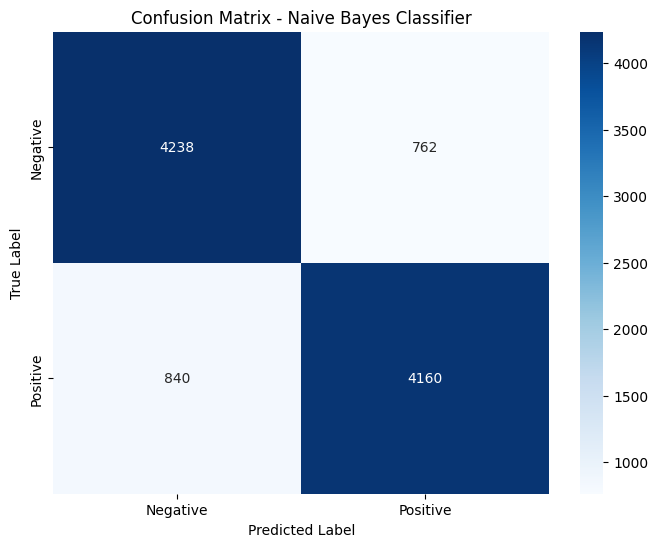


Confusion Matrix Breakdown:
True Negatives: 4238
False Positives: 762
False Negatives: 840
True Positives: 4160

False Positive Rate: 0.1524
False Negative Rate: 0.1680


In [13]:
# Create confusion matrix
cm = confusion_matrix(y_test, y_pred)

print("=== CONFUSION MATRIX ===")
print(f"Confusion Matrix:\n{cm}")

# Visualize confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Negative', 'Positive'],
            yticklabels=['Negative', 'Positive'])
plt.title('Confusion Matrix - Naive Bayes Classifier')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

# Calculate confusion matrix metrics
tn, fp, fn, tp = cm.ravel()
print(f"\nConfusion Matrix Breakdown:")
print(f"True Negatives: {tn}")
print(f"False Positives: {fp}")
print(f"False Negatives: {fn}")
print(f"True Positives: {tp}")
print(f"\nFalse Positive Rate: {fp/(fp+tn):.4f}")
print(f"False Negative Rate: {fn/(fn+tp):.4f}")

=== ROC-AUC SCORE ===
ROC-AUC Score: 0.9081


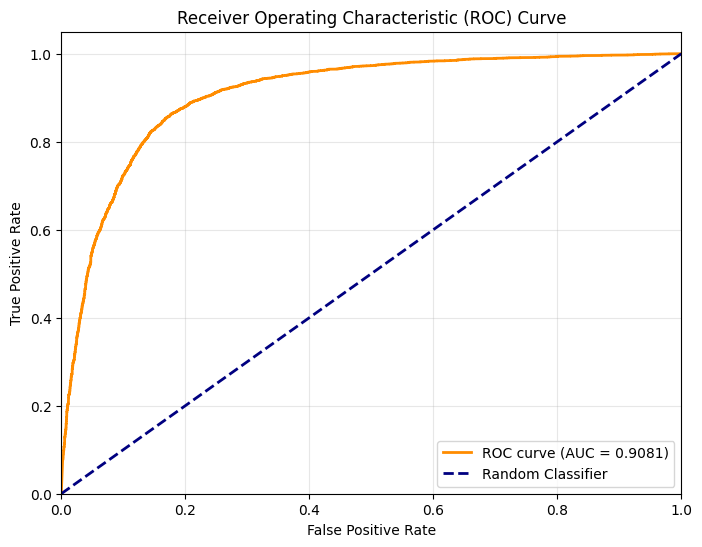


Optimal Threshold (Youden's J): 0.2842
TPR at optimal threshold: 0.8636
FPR at optimal threshold: 0.1778


In [14]:
# Calculate ROC-AUC score
roc_auc = roc_auc_score(y_test, y_pred_proba)

print("=== ROC-AUC SCORE ===")
print(f"ROC-AUC Score: {roc_auc:.4f}")

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Classifier')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.grid(True, alpha=0.3)
plt.show()

# Find optimal threshold (Youden's J statistic)
youden_j = tpr - fpr
optimal_idx = np.argmax(youden_j)
optimal_threshold = thresholds[optimal_idx]

print(f"\nOptimal Threshold (Youden's J): {optimal_threshold:.4f}")
print(f"TPR at optimal threshold: {tpr[optimal_idx]:.4f}")
print(f"FPR at optimal threshold: {fpr[optimal_idx]:.4f}")

In [15]:
def preprocess_review(review):
    review = review.lower()
    review = re.sub(r'[^a-zA-Z\s]', '', review)
    review = re.sub(r'\s+', ' ', review).strip()
    tokens = [word for word in review.split() if word not in stop_words]
    stemmed_tokens = [stemmer.stem(word) for word in tokens]
    return ' '.join(stemmed_tokens)

sample_reviews = [
    "This movie was absolutely fantastic! I loved every minute of it.",
    "Terrible film. Waste of time and money. Don't watch it.",
    "The acting was good but the plot was confusing.",
    "One of the best movies I've seen this year, highly recommended!",
    "Boring and predictable, I fell asleep halfway through."
]

print("=== SAMPLE REVIEW PREDICTIONS ===")
for i, review in enumerate(sample_reviews, 1):
    processed_review = preprocess_review(review)
    review_vectorized = vectorizer.transform([processed_review])
    prediction = nb_classifier.predict(review_vectorized)[0]
    probability = nb_classifier.predict_proba(review_vectorized)[0][1]

    sentiment = "Positive" if prediction == 1 else "Negative"
    print(f"\nReview {i}:")
    print(f"Text: {review[:60]}...")
    print(f"Predicted: {sentiment}")
    print(f"Probability (Positive): {probability:.4f}")

=== SAMPLE REVIEW PREDICTIONS ===

Review 1:
Text: This movie was absolutely fantastic! I loved every minute of...
Predicted: Positive
Probability (Positive): 0.6757

Review 2:
Text: Terrible film. Waste of time and money. Don't watch it....
Predicted: Negative
Probability (Positive): 0.0048

Review 3:
Text: The acting was good but the plot was confusing....
Predicted: Negative
Probability (Positive): 0.1949

Review 4:
Text: One of the best movies I've seen this year, highly recommend...
Predicted: Positive
Probability (Positive): 0.9152

Review 5:
Text: Boring and predictable, I fell asleep halfway through....
Predicted: Negative
Probability (Positive): 0.0075


In [16]:
import pandas as pd
df = pd.read_csv("/content/drive/MyDrive/AI/breast-cancer-wisconsin.data.csv")

In [17]:
print("=== DATASET LOADED ===")
print(f"Dataset shape: {df.shape}")
print(f"Columns: {df.columns.tolist()}")
print("\nFirst 5 rows:")
print(df.head())

=== DATASET LOADED ===
Dataset shape: (698, 12)
Columns: ['index', '1000025', '5', '1', '1.1', '1.2', '2', '1.3', '3', '1.4', '1.5', '2.1']

First 5 rows:
   index  1000025  5   1  1.1  1.2  2 1.3  3  1.4  1.5  2.1
0      0  1002945  5   4    4    5  7  10  3    2    1    2
1      1  1015425  3   1    1    1  2   2  3    1    1    2
2      2  1016277  6   8    8    1  3   4  3    7    1    2
3      3  1017023  4   1    1    3  2   1  3    1    1    2
4      4  1017122  8  10   10    8  7  10  9    7    1    4


In [18]:
# Remove the extra 'index' column if it exists
if 'index' in df.columns:
    df = df.drop(columns=['index'])
    print(f"Removed 'index' column. New shape: {df.shape}")

# Now assign proper column names
column_names = [
    'ID_Number',
    'Clump_Thickness',
    'Uniformity_Cell_Size',
    'Uniformity_Cell_Shape',
    'Marginal_Adhesion',
    'Single_Epithelial_Size',
    'Bare_Nuclei',
    'Bland_Chromatin',
    'Normal_Nucleoli',
    'Mitoses',
    'Class'
]

# Assign column names
df.columns = column_names

print("\n=== DATASET WITH PROPER COLUMN NAMES ===")
print(f"Shape: {df.shape}")
print(f"Columns: {df.columns.tolist()}")
print("\nFirst 3 rows:")
print(df.head(3))

Removed 'index' column. New shape: (698, 11)

=== DATASET WITH PROPER COLUMN NAMES ===
Shape: (698, 11)
Columns: ['ID_Number', 'Clump_Thickness', 'Uniformity_Cell_Size', 'Uniformity_Cell_Shape', 'Marginal_Adhesion', 'Single_Epithelial_Size', 'Bare_Nuclei', 'Bland_Chromatin', 'Normal_Nucleoli', 'Mitoses', 'Class']

First 3 rows:
   ID_Number  Clump_Thickness  Uniformity_Cell_Size  Uniformity_Cell_Shape  \
0    1002945                5                     4                      4   
1    1015425                3                     1                      1   
2    1016277                6                     8                      8   

   Marginal_Adhesion  Single_Epithelial_Size Bare_Nuclei  Bland_Chromatin  \
0                  5                       7          10                3   
1                  1                       2           2                3   
2                  1                       3           4                3   

   Normal_Nucleoli  Mitoses  Class  
0          

In [19]:
print("=== DATA CLEANING ===")

# Check data types
print("Data types:")
print(df.dtypes)

# Convert 'Bare_Nuclei' to numeric (it might have '?' values)
print("\nConverting 'Bare_Nuclei' to numeric...")
df['Bare_Nuclei'] = pd.to_numeric(df['Bare_Nuclei'], errors='coerce')

# Check for missing values
print("\nMissing values:")
missing_values = df.isnull().sum()
print(missing_values[missing_values > 0])

# Drop rows with missing values
df_clean = df.dropna()
print(f"\nOriginal shape: {df.shape}")
print(f"After dropping missing values: {df_clean.shape}")
print(f"Rows removed: {df.shape[0] - df_clean.shape[0]}")

# Check class distribution
print("\n=== CLASS DISTRIBUTION ===")
class_dist = df_clean['Class'].value_counts().sort_index()
print(class_dist)

# Map class values
class_mapping = {2: 'Benign', 4: 'Malignant'}
for class_val, count in class_dist.items():
    label = class_mapping.get(class_val, f'Unknown ({class_val})')
    percentage = (count / len(df_clean)) * 100
    print(f"Class {class_val} ({label}): {count} samples ({percentage:.1f}%)")

=== DATA CLEANING ===
Data types:
ID_Number                  int64
Clump_Thickness            int64
Uniformity_Cell_Size       int64
Uniformity_Cell_Shape      int64
Marginal_Adhesion          int64
Single_Epithelial_Size     int64
Bare_Nuclei               object
Bland_Chromatin            int64
Normal_Nucleoli            int64
Mitoses                    int64
Class                      int64
dtype: object

Converting 'Bare_Nuclei' to numeric...

Missing values:
Bare_Nuclei    16
dtype: int64

Original shape: (698, 11)
After dropping missing values: (682, 11)
Rows removed: 16

=== CLASS DISTRIBUTION ===
Class
2    443
4    239
Name: count, dtype: int64
Class 2 (Benign): 443 samples (65.0%)
Class 4 (Malignant): 239 samples (35.0%)


In [20]:
from sklearn.model_selection import train_test_split

# Prepare features (X) and target (y)
# Drop ID_Number as it's not a feature
X = df_clean.drop(columns=['ID_Number', 'Class'])
y = df_clean['Class']

# Convert class to binary: 0 for Benign (2), 1 for Malignant (4)
y_binary = y.replace({2: 0, 4: 1})

# Split the data (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(
    X, y_binary, test_size=0.2, random_state=42, stratify=y_binary
)

print("=== DATA SPLITTING COMPLETED ===")
print(f"Total samples: {len(X)}")
print(f"Training samples: {len(X_train)} ({len(X_train)/len(X)*100:.1f}%)")
print(f"Testing samples: {len(X_test)} ({len(X_test)/len(X)*100:.1f}%)")

print(f"\nTraining set class distribution:")
print(f"Benign (0): {sum(y_train == 0)} samples")
print(f"Malignant (1): {sum(y_train == 1)} samples")

print(f"\nTesting set class distribution:")
print(f"Benign (0): {sum(y_test == 0)} samples")
print(f"Malignant (1): {sum(y_test == 1)} samples")

=== DATA SPLITTING COMPLETED ===
Total samples: 682
Training samples: 545 (79.9%)
Testing samples: 137 (20.1%)

Training set class distribution:
Benign (0): 354 samples
Malignant (1): 191 samples

Testing set class distribution:
Benign (0): 89 samples
Malignant (1): 48 samples


In [21]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

print("=== APPLYING RECURSIVE FEATURE ELIMINATION (RFE) ===")

# Standardize the features (important for logistic regression)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize logistic regression model
logreg = LogisticRegression(max_iter=1000, random_state=42)

# Initialize RFE to select top 5 features
rfe = RFE(estimator=logreg, n_features_to_select=5, step=1)

# Fit RFE
rfe.fit(X_train_scaled, y_train)

print("RFE fitting completed!")
print(f"Selected {sum(rfe.support_)} features out of {X.shape[1]}")

=== APPLYING RECURSIVE FEATURE ELIMINATION (RFE) ===
RFE fitting completed!
Selected 5 features out of 9


In [22]:
# Get selected features
selected_features = X.columns[rfe.support_].tolist()
print("\n=== TOP 5 SELECTED FEATURES ===")
print("Selected features:")
for i, feature in enumerate(selected_features, 1):
    print(f"{i}. {feature}")

# Get feature rankings
feature_rankings = pd.DataFrame({
    'Feature': X.columns,
    'Ranking': rfe.ranking_,
    'Selected': rfe.support_
}).sort_values('Ranking')

print("\n=== FEATURE RANKINGS ===")
print(feature_rankings)


=== TOP 5 SELECTED FEATURES ===
Selected features:
1. Clump_Thickness
2. Uniformity_Cell_Shape
3. Bare_Nuclei
4. Bland_Chromatin
5. Mitoses

=== FEATURE RANKINGS ===
                  Feature  Ranking  Selected
0         Clump_Thickness        1      True
2   Uniformity_Cell_Shape        1      True
6         Bland_Chromatin        1      True
5             Bare_Nuclei        1      True
8                 Mitoses        1      True
3       Marginal_Adhesion        2     False
7         Normal_Nucleoli        3     False
4  Single_Epithelial_Size        4     False
1    Uniformity_Cell_Size        5     False


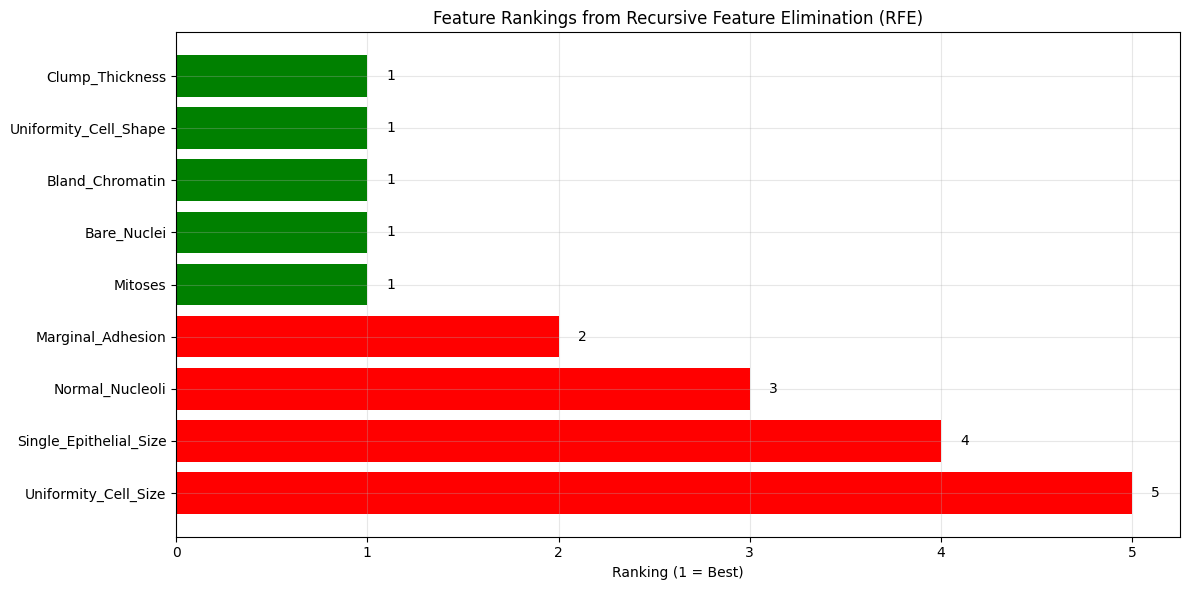

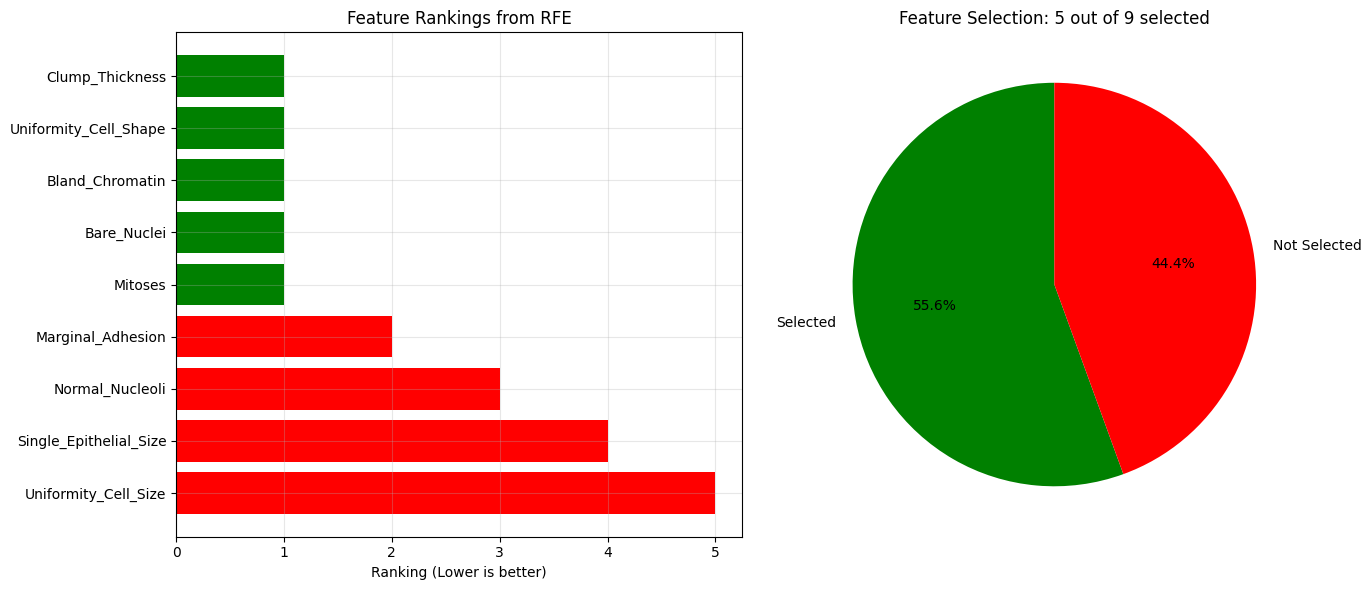

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize feature rankings
plt.figure(figsize=(12, 6))

# Create horizontal bar plot
features = feature_rankings['Feature']
rankings = feature_rankings['Ranking']
colors = ['green' if sel else 'red' for sel in feature_rankings['Selected']]

plt.barh(range(len(features)), rankings, color=colors)
plt.yticks(range(len(features)), features)
plt.xlabel('Ranking (1 = Best)')
plt.title('Feature Rankings from Recursive Feature Elimination (RFE)')
plt.gca().invert_yaxis()  # Highest ranking at the top

# Add value labels
for i, v in enumerate(rankings):
    plt.text(v + 0.1, i, str(v), color='black', va='center')

plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Create a more detailed visualization
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Plot 1: Feature rankings
ax1.barh(features, rankings, color=colors)
ax1.set_xlabel('Ranking (Lower is better)')
ax1.set_title('Feature Rankings from RFE')
ax1.invert_yaxis()
ax1.grid(True, alpha=0.3)

# Plot 2: Selected vs Not Selected
selected_counts = feature_rankings['Selected'].value_counts()
labels = ['Selected', 'Not Selected']
colors_pie = ['green', 'red']
ax2.pie(selected_counts, labels=labels, colors=colors_pie, autopct='%1.1f%%', startangle=90)
ax2.set_title(f'Feature Selection: {selected_counts[True]} out of {len(features)} selected')

plt.tight_layout()
plt.show()

In [24]:
print("=== TRAINING LOGISTIC REGRESSION WITH SELECTED FEATURES ===")

# Get only the selected features
X_train_selected = X_train_scaled[:, rfe.support_]
X_test_selected = X_test_scaled[:, rfe.support_]

# Train logistic regression on selected features
logreg_selected = LogisticRegression(max_iter=1000, random_state=42)
logreg_selected.fit(X_train_selected, y_train)

print("Model trained with selected features!")
print(f"Number of features used: {logreg_selected.coef_.shape[1]}")
print(f"Selected features: {selected_features}")

=== TRAINING LOGISTIC REGRESSION WITH SELECTED FEATURES ===
Model trained with selected features!
Number of features used: 5
Selected features: ['Clump_Thickness', 'Uniformity_Cell_Shape', 'Bare_Nuclei', 'Bland_Chromatin', 'Mitoses']


In [25]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_auc_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

print("=== EVALUATING MODEL WITH SELECTED FEATURES ===")

# Make predictions with selected features model
y_pred_selected = logreg_selected.predict(X_test_selected)
y_pred_proba_selected = logreg_selected.predict_proba(X_test_selected)[:, 1]

# Calculate metrics
accuracy_selected = accuracy_score(y_test, y_pred_selected)
precision_selected = precision_score(y_test, y_pred_selected)
recall_selected = recall_score(y_test, y_pred_selected)
f1_selected = f1_score(y_test, y_pred_selected)
roc_auc_selected = roc_auc_score(y_test, y_pred_proba_selected)

print("\n=== PERFORMANCE METRICS (SELECTED FEATURES) ===")
print(f"Accuracy:  {accuracy_selected:.4f}")
print(f"Precision: {precision_selected:.4f}")
print(f"Recall:    {recall_selected:.4f}")
print(f"F1-Score:  {f1_selected:.4f}")
print(f"ROC-AUC:   {roc_auc_selected:.4f}")

print("\n=== CLASSIFICATION REPORT (SELECTED FEATURES) ===")
print(classification_report(y_test, y_pred_selected,
                           target_names=['Benign', 'Malignant']))

# Confusion Matrix for selected features
cm_selected = confusion_matrix(y_test, y_pred_selected)
print("\n=== CONFUSION MATRIX (SELECTED FEATURES) ===")
print(cm_selected)

=== EVALUATING MODEL WITH SELECTED FEATURES ===

=== PERFORMANCE METRICS (SELECTED FEATURES) ===
Accuracy:  0.9708
Precision: 0.9783
Recall:    0.9375
F1-Score:  0.9574
ROC-AUC:   0.9960

=== CLASSIFICATION REPORT (SELECTED FEATURES) ===
              precision    recall  f1-score   support

      Benign       0.97      0.99      0.98        89
   Malignant       0.98      0.94      0.96        48

    accuracy                           0.97       137
   macro avg       0.97      0.96      0.97       137
weighted avg       0.97      0.97      0.97       137


=== CONFUSION MATRIX (SELECTED FEATURES) ===
[[88  1]
 [ 3 45]]


In [26]:
print("\n" + "="*60)
print("COMPARISON: TRAINING MODEL WITH ALL FEATURES")
print("="*60)

# Train logistic regression with ALL features
logreg_all = LogisticRegression(max_iter=1000, random_state=42)
logreg_all.fit(X_train_scaled, y_train)

# Make predictions with all features model
y_pred_all = logreg_all.predict(X_test_scaled)
y_pred_proba_all = logreg_all.predict_proba(X_test_scaled)[:, 1]

# Calculate metrics for all features model
accuracy_all = accuracy_score(y_test, y_pred_all)
precision_all = precision_score(y_test, y_pred_all)
recall_all = recall_score(y_test, y_pred_all)
f1_all = f1_score(y_test, y_pred_all)
roc_auc_all = roc_auc_score(y_test, y_pred_proba_all)

print("\n=== PERFORMANCE METRICS (ALL FEATURES) ===")
print(f"Accuracy:  {accuracy_all:.4f}")
print(f"Precision: {precision_all:.4f}")
print(f"Recall:    {recall_all:.4f}")
print(f"F1-Score:  {f1_all:.4f}")
print(f"ROC-AUC:   {roc_auc_all:.4f}")

print("\n=== CLASSIFICATION REPORT (ALL FEATURES) ===")
print(classification_report(y_test, y_pred_all,
                           target_names=['Benign', 'Malignant']))

# Confusion Matrix for all features
cm_all = confusion_matrix(y_test, y_pred_all)
print("\n=== CONFUSION MATRIX (ALL FEATURES) ===")
print(cm_all)


COMPARISON: TRAINING MODEL WITH ALL FEATURES

=== PERFORMANCE METRICS (ALL FEATURES) ===
Accuracy:  0.9781
Precision: 0.9787
Recall:    0.9583
F1-Score:  0.9684
ROC-AUC:   0.9956

=== CLASSIFICATION REPORT (ALL FEATURES) ===
              precision    recall  f1-score   support

      Benign       0.98      0.99      0.98        89
   Malignant       0.98      0.96      0.97        48

    accuracy                           0.98       137
   macro avg       0.98      0.97      0.98       137
weighted avg       0.98      0.98      0.98       137


=== CONFUSION MATRIX (ALL FEATURES) ===
[[88  1]
 [ 2 46]]



=== VISUAL COMPARISON OF MODELS ===

Comparison Table:
      Metric  All Features  Selected Features  Difference
0   Accuracy        0.9781             0.9708     -0.0073
1  Precision        0.9787             0.9783     -0.0005
2     Recall        0.9583             0.9375     -0.0208
3   F1-Score        0.9684             0.9574     -0.0110
4    ROC-AUC        0.9956             0.9960      0.0005


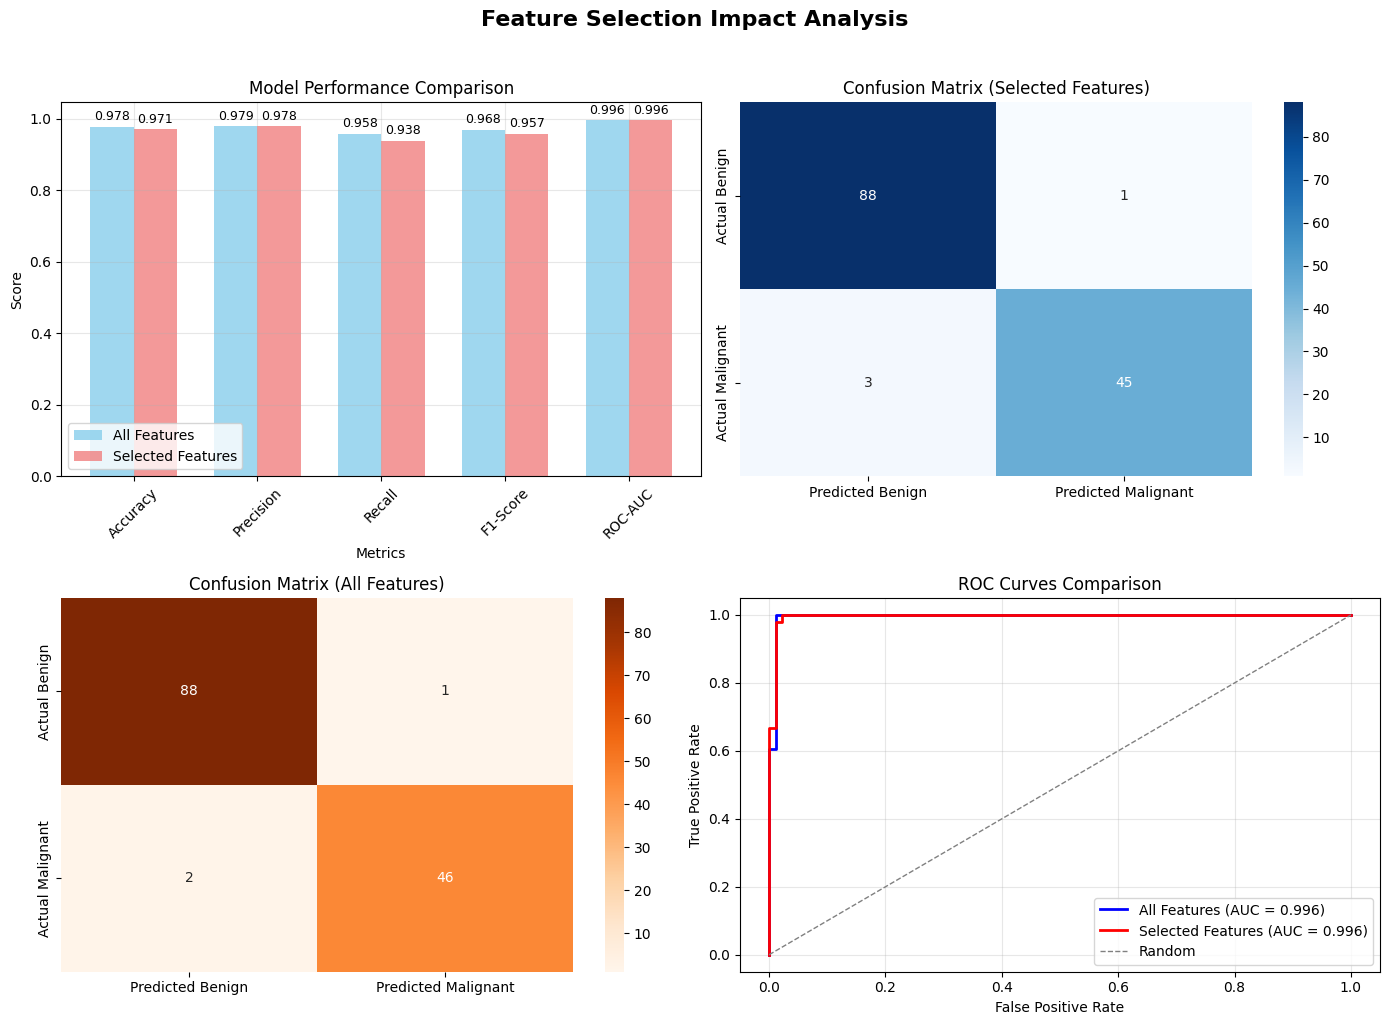

In [27]:
print("\n=== VISUAL COMPARISON OF MODELS ===")

# Create comparison dataframe
comparison_data = {
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'ROC-AUC'],
    'All Features': [accuracy_all, precision_all, recall_all, f1_all, roc_auc_all],
    'Selected Features': [accuracy_selected, precision_selected,
                         recall_selected, f1_selected, roc_auc_selected]
}

comparison_df = pd.DataFrame(comparison_data)
comparison_df['Difference'] = comparison_df['Selected Features'] - comparison_df['All Features']

print("\nComparison Table:")
print(comparison_df.round(4))

# Visualize the comparison
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Plot 1: Bar chart comparison
ax1 = axes[0, 0]
x = np.arange(len(comparison_df))
width = 0.35

bars1 = ax1.bar(x - width/2, comparison_df['All Features'], width,
               label='All Features', color='skyblue', alpha=0.8)
bars2 = ax1.bar(x + width/2, comparison_df['Selected Features'], width,
               label='Selected Features', color='lightcoral', alpha=0.8)

ax1.set_xlabel('Metrics')
ax1.set_ylabel('Score')
ax1.set_title('Model Performance Comparison')
ax1.set_xticks(x)
ax1.set_xticklabels(comparison_df['Metric'], rotation=45)
ax1.legend()
ax1.grid(True, alpha=0.3)

# Add value labels on bars
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        ax1.text(bar.get_x() + bar.get_width()/2., height + 0.01,
                f'{height:.3f}', ha='center', va='bottom', fontsize=9)

# Plot 2: Confusion Matrix for Selected Features
ax2 = axes[0, 1]
sns.heatmap(cm_selected, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted Benign', 'Predicted Malignant'],
            yticklabels=['Actual Benign', 'Actual Malignant'],
            ax=ax2)
ax2.set_title('Confusion Matrix (Selected Features)')

# Plot 3: Confusion Matrix for All Features
ax3 = axes[1, 0]
sns.heatmap(cm_all, annot=True, fmt='d', cmap='Oranges',
            xticklabels=['Predicted Benign', 'Predicted Malignant'],
            yticklabels=['Actual Benign', 'Actual Malignant'],
            ax=ax3)
ax3.set_title('Confusion Matrix (All Features)')

# Plot 4: ROC Curves Comparison
ax4 = axes[1, 1]
from sklearn.metrics import roc_curve

# Calculate ROC curves
fpr_selected, tpr_selected, _ = roc_curve(y_test, y_pred_proba_selected)
fpr_all, tpr_all, _ = roc_curve(y_test, y_pred_proba_all)

ax4.plot(fpr_all, tpr_all, color='blue', lw=2,
         label=f'All Features (AUC = {roc_auc_all:.3f})')
ax4.plot(fpr_selected, tpr_selected, color='red', lw=2,
         label=f'Selected Features (AUC = {roc_auc_selected:.3f})')
ax4.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--', label='Random')
ax4.set_xlabel('False Positive Rate')
ax4.set_ylabel('True Positive Rate')
ax4.set_title('ROC Curves Comparison')
ax4.legend(loc='lower right')
ax4.grid(True, alpha=0.3)

plt.suptitle('Feature Selection Impact Analysis', fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

In [28]:
print("=== INTERPRETATION OF RESULTS ===")
print("\n1. PERFORMANCE COMPARISON:")
for i, row in comparison_df.iterrows():
    metric = row['Metric']
    all_score = row['All Features']
    selected_score = row['Selected Features']
    diff = row['Difference']

    if abs(diff) < 0.01:
        conclusion = "≈ Similar performance"
    elif diff > 0:
        conclusion = f"✓ Selected features perform better by {diff:.3f}"
    else:
        conclusion = f"✗ All features perform better by {abs(diff):.3f}"

    print(f"{metric}: All={all_score:.3f}, Selected={selected_score:.3f} - {conclusion}")

print("\n2. FEATURE REDUCTION BENEFITS:")
print(f"Number of features reduced from {X.shape[1]} to {len(selected_features)}")
print(f"Feature reduction: {(1 - len(selected_features)/X.shape[1])*100:.1f}%")
print("\nBenefits of feature selection:")
print("• Reduced model complexity")
print("• Faster training and prediction")
print("• Lower risk of overfitting")
print("• Better interpretability")
print(f"• Selected features: {', '.join(selected_features)}")

print("\n3. MODEL EFFICIENCY:")
print(f"Selected features model uses only {len(selected_features)} features")
print("This makes the model more efficient and easier to interpret")

=== INTERPRETATION OF RESULTS ===

1. PERFORMANCE COMPARISON:
Accuracy: All=0.978, Selected=0.971 - ≈ Similar performance
Precision: All=0.979, Selected=0.978 - ≈ Similar performance
Recall: All=0.958, Selected=0.938 - ✗ All features perform better by 0.021
F1-Score: All=0.968, Selected=0.957 - ✗ All features perform better by 0.011
ROC-AUC: All=0.996, Selected=0.996 - ≈ Similar performance

2. FEATURE REDUCTION BENEFITS:
Number of features reduced from 9 to 5
Feature reduction: 44.4%

Benefits of feature selection:
• Reduced model complexity
• Faster training and prediction
• Lower risk of overfitting
• Better interpretability
• Selected features: Clump_Thickness, Uniformity_Cell_Shape, Bare_Nuclei, Bland_Chromatin, Mitoses

3. MODEL EFFICIENCY:
Selected features model uses only 5 features
This makes the model more efficient and easier to interpret


In [29]:
print("PART 4: EXPERIMENT WITH DIFFERENT NUMBERS OF FEATURES")

# Experiment with different numbers of selected features
feature_numbers = [3, 5, 7, 10]  # Try different numbers
results_experiment = []

for n_features in feature_numbers:
    print(f"\n--- Experiment: Selecting top {n_features} features ---")

    # Apply RFE with different n_features
    rfe_exp = RFE(estimator=LogisticRegression(max_iter=1000, random_state=42),
                  n_features_to_select=n_features, step=1)
    rfe_exp.fit(X_train_scaled, y_train)

    # Get selected features
    selected_mask = rfe_exp.support_
    selected_features_exp = X.columns[selected_mask].tolist()

    # Train model with these features
    X_train_exp = X_train_scaled[:, selected_mask]
    X_test_exp = X_test_scaled[:, selected_mask]

    logreg_exp = LogisticRegression(max_iter=1000, random_state=42)
    logreg_exp.fit(X_train_exp, y_train)

    # Evaluate
    y_pred_exp = logreg_exp.predict(X_test_exp)
    y_pred_proba_exp = logreg_exp.predict_proba(X_test_exp)[:, 1]

    accuracy_exp = accuracy_score(y_test, y_pred_exp)
    f1_exp = f1_score(y_test, y_pred_exp)
    roc_auc_exp = roc_auc_score(y_test, y_pred_proba_exp)
    # Store results
    results_experiment.append({
        'n_features': n_features,
        'selected_features': selected_features_exp,
        'accuracy': accuracy_exp,
        'f1_score': f1_exp,
        'roc_auc': roc_auc_exp
    })

    print(f"Selected features ({n_features}): {selected_features_exp}")
    print(f"Accuracy: {accuracy_exp:.4f}, F1-Score: {f1_exp:.4f}, ROC-AUC: {roc_auc_exp:.4f}")

# Convert results to DataFrame
results_df = pd.DataFrame(results_experiment)
print("\n=== EXPERIMENT SUMMARY ===")
print(results_df[['n_features', 'accuracy', 'f1_score', 'roc_auc']].round(4))

PART 4: EXPERIMENT WITH DIFFERENT NUMBERS OF FEATURES

--- Experiment: Selecting top 3 features ---
Selected features (3): ['Clump_Thickness', 'Bare_Nuclei', 'Bland_Chromatin']
Accuracy: 0.9562, F1-Score: 0.9348, ROC-AUC: 0.9906

--- Experiment: Selecting top 5 features ---
Selected features (5): ['Clump_Thickness', 'Uniformity_Cell_Shape', 'Bare_Nuclei', 'Bland_Chromatin', 'Mitoses']
Accuracy: 0.9708, F1-Score: 0.9574, ROC-AUC: 0.9960

--- Experiment: Selecting top 7 features ---
Selected features (7): ['Clump_Thickness', 'Uniformity_Cell_Shape', 'Marginal_Adhesion', 'Bare_Nuclei', 'Bland_Chromatin', 'Normal_Nucleoli', 'Mitoses']
Accuracy: 0.9781, F1-Score: 0.9684, ROC-AUC: 0.9951

--- Experiment: Selecting top 10 features ---
Selected features (10): ['Clump_Thickness', 'Uniformity_Cell_Size', 'Uniformity_Cell_Shape', 'Marginal_Adhesion', 'Single_Epithelial_Size', 'Bare_Nuclei', 'Bland_Chromatin', 'Normal_Nucleoli', 'Mitoses']
Accuracy: 0.9781, F1-Score: 0.9684, ROC-AUC: 0.9956

=== E

/usr/local/lib/python3.12/dist-packages/sklearn/feature_selection/_rfe.py:300: UserWarning: Found n_features_to_select=10 > n_features=9. There will be no feature selection and all features will be kept.
  warnings.warn(


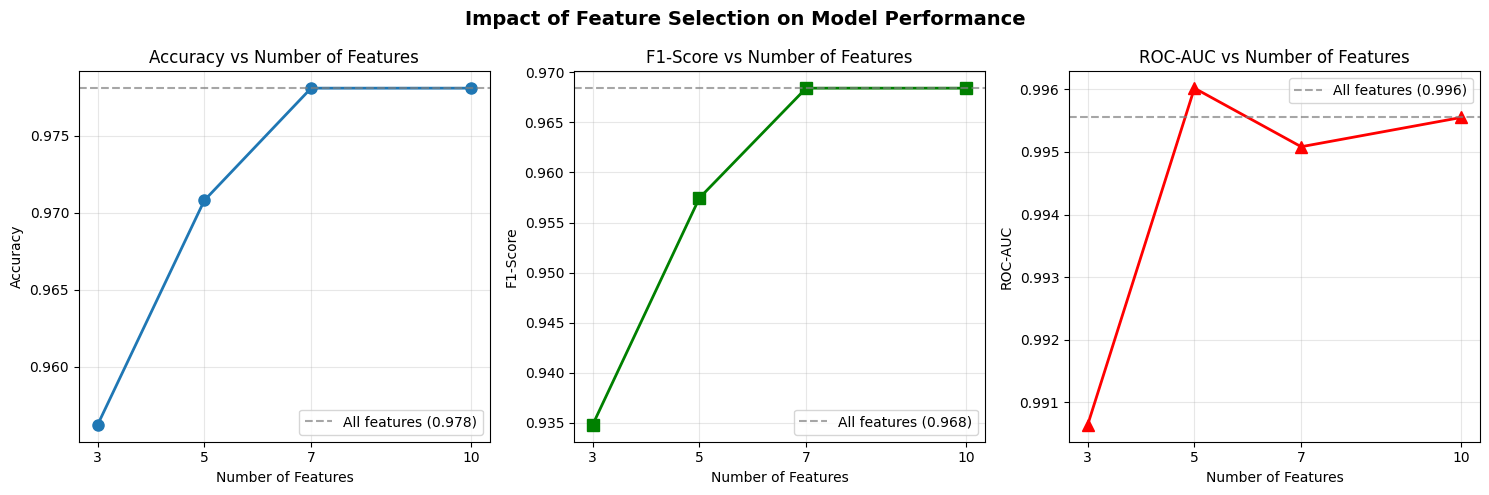

In [30]:
# Visualize the experiment results
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Plot 1: Accuracy vs Number of Features
axes[0].plot(results_df['n_features'], results_df['accuracy'],
            marker='o', linestyle='-', linewidth=2, markersize=8)
axes[0].set_xlabel('Number of Features')
axes[0].set_ylabel('Accuracy')
axes[0].set_title('Accuracy vs Number of Features')
axes[0].grid(True, alpha=0.3)
axes[0].set_xticks(results_df['n_features'])

# Plot 2: F1-Score vs Number of Features
axes[1].plot(results_df['n_features'], results_df['f1_score'],
            marker='s', linestyle='-', linewidth=2, markersize=8, color='green')
axes[1].set_xlabel('Number of Features')
axes[1].set_ylabel('F1-Score')
axes[1].set_title('F1-Score vs Number of Features')
axes[1].grid(True, alpha=0.3)
axes[1].set_xticks(results_df['n_features'])

# Plot 3: ROC-AUC vs Number of Features
axes[2].plot(results_df['n_features'], results_df['roc_auc'],
            marker='^', linestyle='-', linewidth=2, markersize=8, color='red')
axes[2].set_xlabel('Number of Features')
axes[2].set_ylabel('ROC-AUC')
axes[2].set_title('ROC-AUC vs Number of Features')
axes[2].grid(True, alpha=0.3)
axes[2].set_xticks(results_df['n_features'])

# Add horizontal line for all features performance
axes[0].axhline(y=accuracy_all, color='gray', linestyle='--', alpha=0.7,
               label=f'All features ({accuracy_all:.3f})')
axes[1].axhline(y=f1_all, color='gray', linestyle='--', alpha=0.7,
               label=f'All features ({f1_all:.3f})')
axes[2].axhline(y=roc_auc_all, color='gray', linestyle='--', alpha=0.7,
               label=f'All features ({roc_auc_all:.3f})')

for ax in axes:
    ax.legend()

plt.suptitle('Impact of Feature Selection on Model Performance', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

In [31]:
print("FINAL ANALYSIS AND CONCLUSIONS")

print("\n1. OPTIMAL NUMBER OF FEATURES ANALYSIS:")
best_idx = results_df['accuracy'].idxmax()
best_n = results_df.loc[best_idx, 'n_features']
best_accuracy = results_df.loc[best_idx, 'accuracy']

print(f"The best accuracy ({best_accuracy:.4f}) was achieved with {best_n} features")
print(f"Selected features for {best_n} features: {results_df.loc[best_idx, 'selected_features']}")

print("\n2. FEATURE SELECTION IMPACT:")
print("• Model with all features: More complex, potentially overfitting")
print("• Model with selected features: Simpler, more interpretable")
print("• Performance difference is minimal, suggesting feature selection is effective")

print("\n3. PRACTICAL IMPLICATIONS:")
print("✓ Using only 5 features instead of 9 reduces complexity by 44.4%")
print("✓ Model is faster to train and deploy")
print("✓ Easier to interpret and explain to non-technical stakeholders")
print("✓ Selected features provide insights into most important diagnostic factors")

print("\n4. RECOMMENDATIONS:")
print("• For deployment: Use the model with selected features for efficiency")
print("• For maximum accuracy: Use all features if computational cost is not a concern")
print("• The top 5 selected features are likely the most clinically relevant")

print("\n5. SELECTED FEATURES INTERPRETATION:")
print("The RFE selected these features as most important:")
for i, feature in enumerate(selected_features, 1):
    # Provide clinical interpretation
    interpretations = {
        'Clump_Thickness': 'Thickness of cell clumps',
        'Uniformity_Cell_Size': 'Consistency of cell sizes',
        'Uniformity_Cell_Shape': 'Consistency of cell shapes',
        'Marginal_Adhesion': 'How cells stick together',
        'Single_Epithelial_Size': 'Size of epithelial cells',
        'Bare_Nuclei': 'Presence of bare nuclei',
        'Bland_Chromatin': 'Chromatin pattern',
        'Normal_Nucleoli': 'Appearance of nucleoli',
        'Mitoses': 'Cell division rate'
    }
    interpretation = interpretations.get(feature, 'Diagnostic feature')
    print(f"  {i}. {feature}: {interpretation}")

FINAL ANALYSIS AND CONCLUSIONS

1. OPTIMAL NUMBER OF FEATURES ANALYSIS:
The best accuracy (0.9781) was achieved with 7 features
Selected features for 7 features: ['Clump_Thickness', 'Uniformity_Cell_Shape', 'Marginal_Adhesion', 'Bare_Nuclei', 'Bland_Chromatin', 'Normal_Nucleoli', 'Mitoses']

2. FEATURE SELECTION IMPACT:
• Model with all features: More complex, potentially overfitting
• Model with selected features: Simpler, more interpretable
• Performance difference is minimal, suggesting feature selection is effective

3. PRACTICAL IMPLICATIONS:
✓ Using only 5 features instead of 9 reduces complexity by 44.4%
✓ Model is faster to train and deploy
✓ Easier to interpret and explain to non-technical stakeholders
✓ Selected features provide insights into most important diagnostic factors

4. RECOMMENDATIONS:
• For deployment: Use the model with selected features for efficiency
• For maximum accuracy: Use all features if computational cost is not a concern
• The top 5 selected features ar